# 02: Creating Plots

In [1]:
library(IRdisplay)
display_html('<iframe width="560" height="315" src="https://www.youtube.com/embed/MXr3tp6Q1aA" frameborder="0" allowfullscreen></iframe>')

In this chapter we will look at how to plot data from a NetCDF file. We will look at a 1D data variable as well as some 2D data that we will plot on a map. Let's load in some libraries that we will use.

In [21]:
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}
library(ggplot2)
library(RNetCDF)
if (!requireNamespace("maps", quietly = TRUE)) {
  install.packages("maps")
}
library(maps)

## 1D data

We will start by looking at a depth profile of Chlorophyll A data. If you use these data in a publication, please cite them in your list of references with the following citation:

Anna Vader, Lucie Goraguer, Luke Marsden (2022) Chlorophyll A and phaeopigments Nansen Legacy cruise 2021708 station P4 (NLEG11) 2021-07-18T08:50:42 https://doi.org/10.21335/NMDC-1248407516-P4(NLEG11)

In [3]:
url <- 'https://opendap1.nodc.no/opendap/chemistry/point/cruise/nansen_legacy/2021708/Chlorophyll_A_and_phaeopigments_Nansen_Legacy_cruise_2021708_station_P4_NLEG11_20210718T085042.nc'
data <- open.nc(url)

depth <- var.get.nc(data, 'DEPTH')
chla_total <- var.get.nc(data, 'CHLOROPHYLL_A_TOTAL')

Let's create a quick line plot.

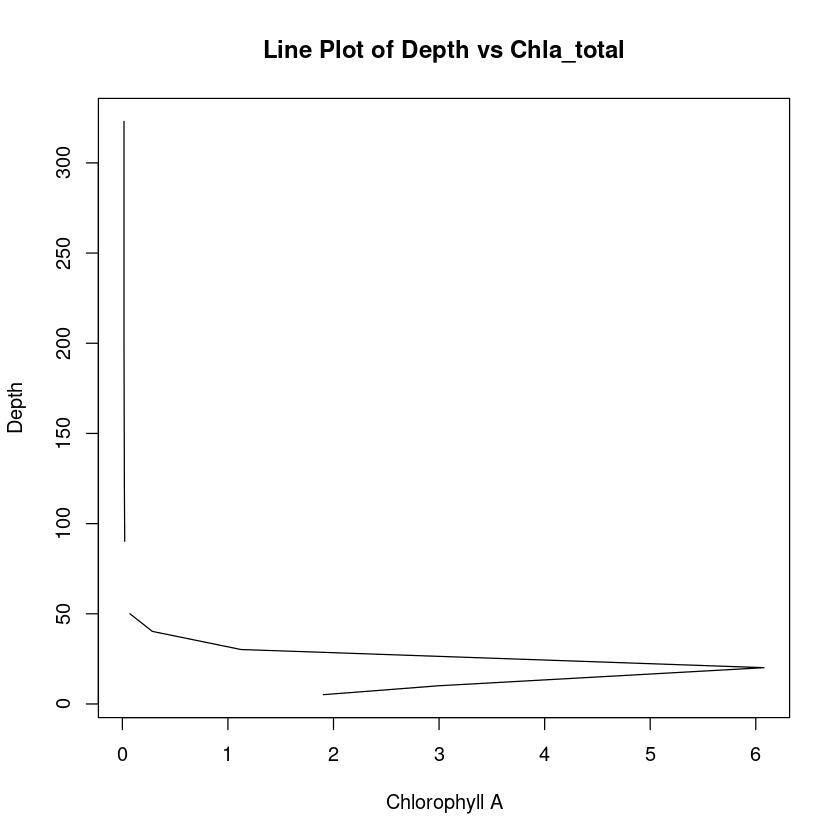

In [4]:
plot(
  chla_total,
  depth,
  type = "l",
  xlab = "Chlorophyll A",
  ylab = "Depth",
  main = "Line Plot of Depth vs Chla_total",
)

Let's turn that around so depth is increasing going downwards.

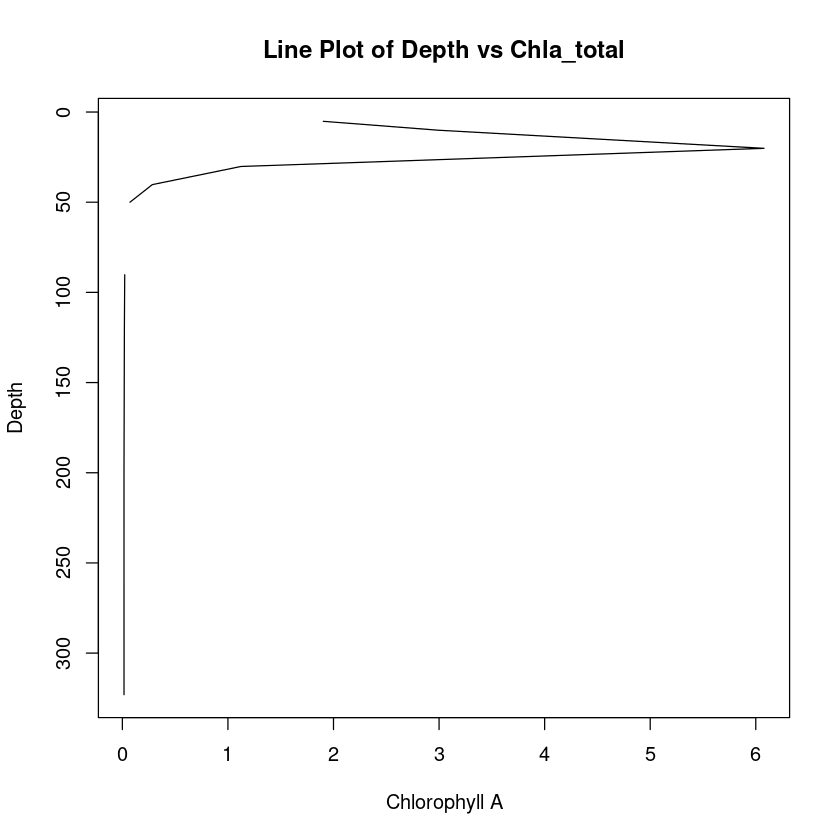

In [5]:
plot(
  chla_total,
  depth,
  type = "l",
  xlab = "Chlorophyll A",
  ylab = "Depth",
  main = "Line Plot of Depth vs Chla_total",
  ylim = c(max(depth), min(depth))
)

We can alternatively make a scatter plot.

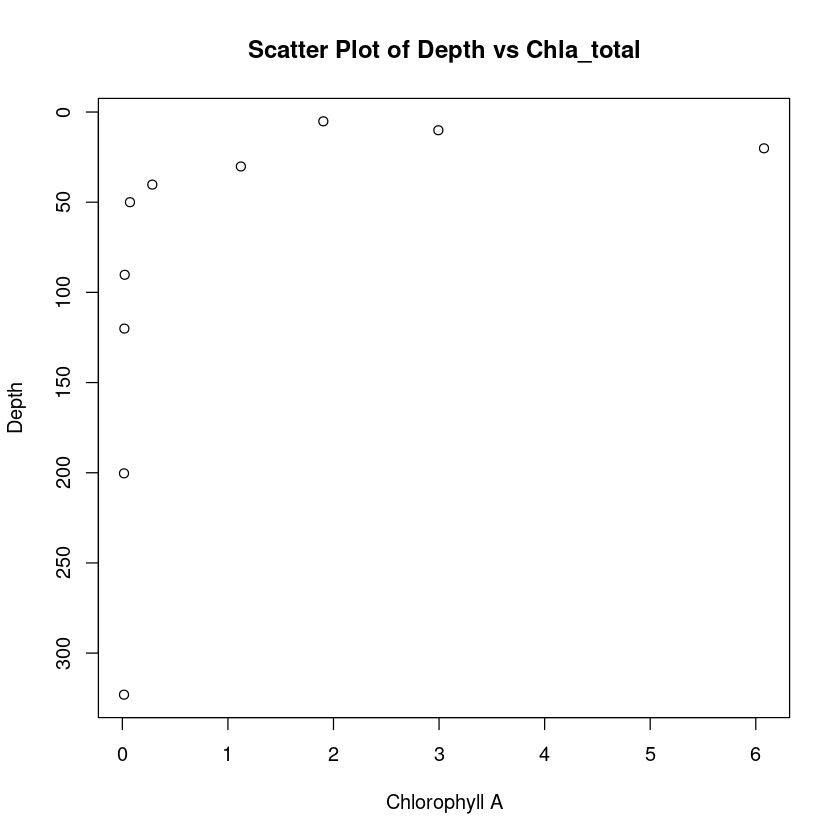

In [6]:
plot(
  chla_total,
  depth,
  type = "p",  # Change from "l" to "p" for scatter plot
  xlab = "Chlorophyll A",
  ylab = "Depth",
  main = "Scatter Plot of Depth vs Chla_total",
  ylim = c(max(depth), min(depth))
)

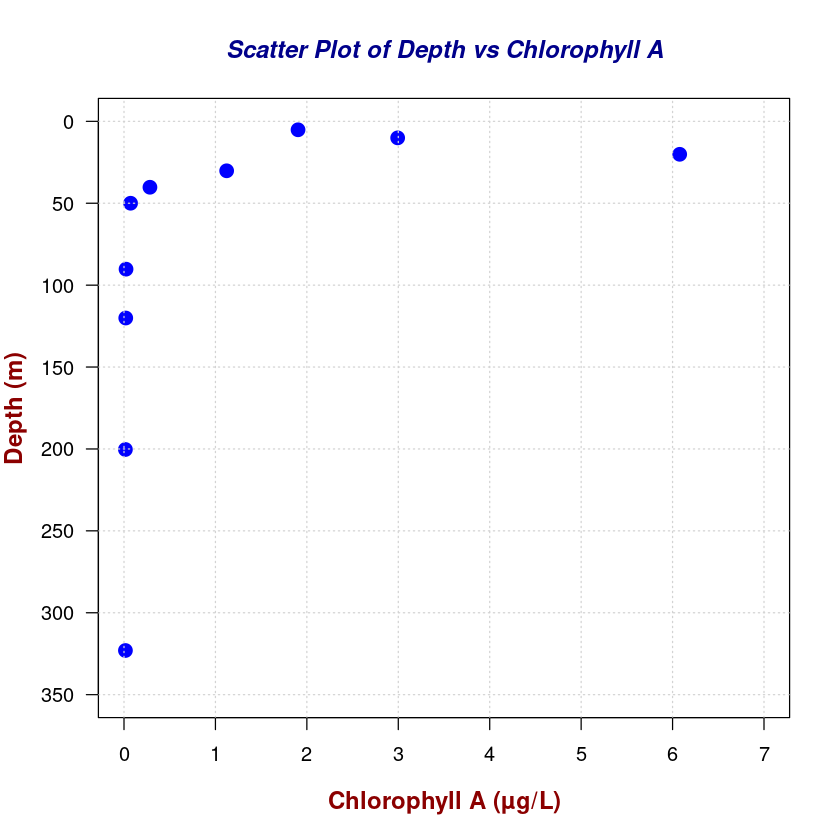

In [7]:
# Enhanced Scatter Plot
plot(
  chla_total,
  depth,
  type = "p",  # Scatter plot
  pch = 19,    # Solid circle points
  col = "blue",# Point color
  cex = 1.5,   # Point size
  xlab = "",
  ylab = "",
  ylim = c(350, 0),
  xlim = c(0, 7),
  las = 1,     # Horizontal y-axis labels
)

# Add a grid for better readability
grid(col = "lightgray", lty = "dotted", lwd = 1)

# Customize axis labels and main title
title(
  main = "Scatter Plot of Depth vs Chlorophyll A",
  col.main = "darkblue",
  font.main = 4,  # Bold and italic main title
  cex.main = 1.2  # Main title size
)
title(
  xlab = "Chlorophyll A (µg/L)",
  ylab = "Depth (m)",
  col.lab = "darkred",
  font.lab = 2,   # Bold axis labels
  cex.lab = 1.2   # Axis labels size
)



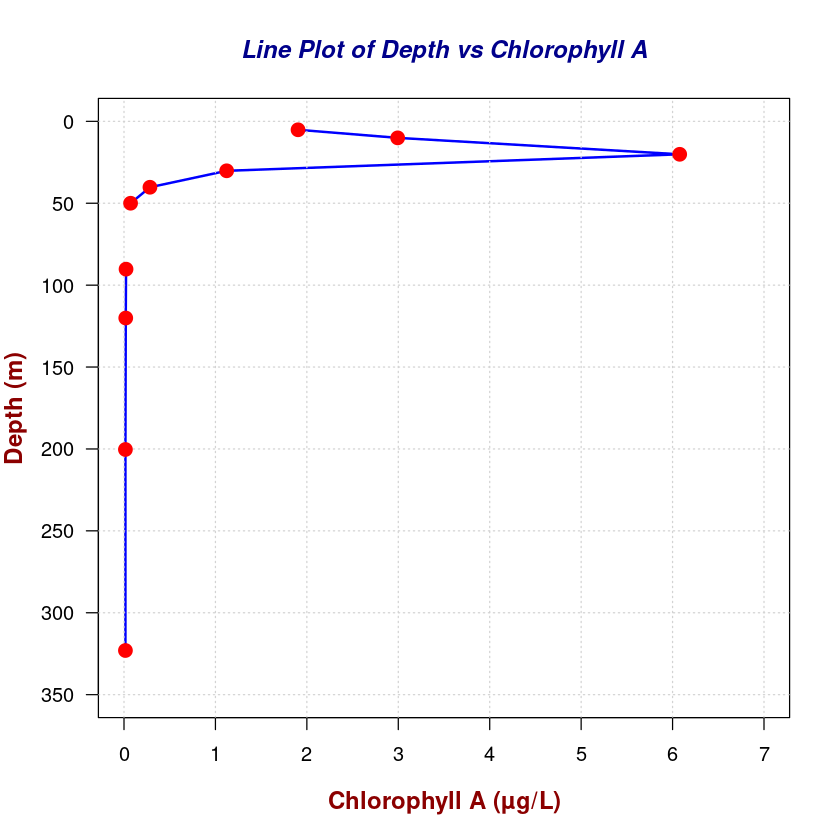

In [8]:
# Enhanced Line Plot
plot(
  chla_total,
  depth,
  type = "l",  # Line plot
  lwd = 2,     # Line width
  col = "blue",# Line color
  xlab = "",
  ylab = "",
  ylim = c(350, 0),
  xlim = c(0, 7),
  las = 1     # Horizontal y-axis labels
)

# Add a grid for better readability
grid(col = "lightgray", lty = "dotted", lwd = 1)

# Customize axis labels and main title
title(
  main = "Line Plot of Depth vs Chlorophyll A",
  col.main = "darkblue",
  font.main = 4,  # Bold and italic main title
  cex.main = 1.2  # Main title size
)
title(
  xlab = "Chlorophyll A (µg/L)",
  ylab = "Depth (m)",
  col.lab = "darkred",
  font.lab = 2,   # Bold axis labels
  cex.lab = 1.2   # Axis labels size
)

# Add points on the line plot
points(
  chla_total, 
  depth, 
  pch = 19, 
  col = "red", 
  cex = 1.5
)

## Plotting 2D data on a map

We will load in some multidimensional data now. This is a dataset of global surface temperature anomalies from the NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 5.0. We introduced these data in [tutorial #01](01_opening_and_understanding.ipynb).

https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C01585

H.-M. Zhang, B. Huang, J. H. Lawrimore, M. J. Menne, and T. M. Smith (2019): NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 5.0. NOAA National Centers for Environmental Information. doi:10.25921/9qth-2p70 Accessed 2024-04-09.

In [9]:
url <- 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
data <- open.nc(url)

We want to access the *anom* variable and extract data only for a data of our choice. Let's repeat the steps we took in [tutorial #01](01_opening_and_understanding.ipynb) to do this.

In [10]:
latitude <- var.get.nc(data, 'lat')
longitude <- var.get.nc(data, 'lon')

desired_date <- as.Date('2020-01-01')
days_since_1800 <- as.numeric(difftime(desired_date, as.Date('1800-01-01'), units = 'days'))

time <- var.get.nc(data, "time") 
# Finding index of the value
time_index <- which(time == days_since_1800)

anom <- var.get.nc(data, 'anom', start=c(NA, NA, 1, time_index), count=c(NA,NA,1,1))

Now let's make a very basic plot of the data.

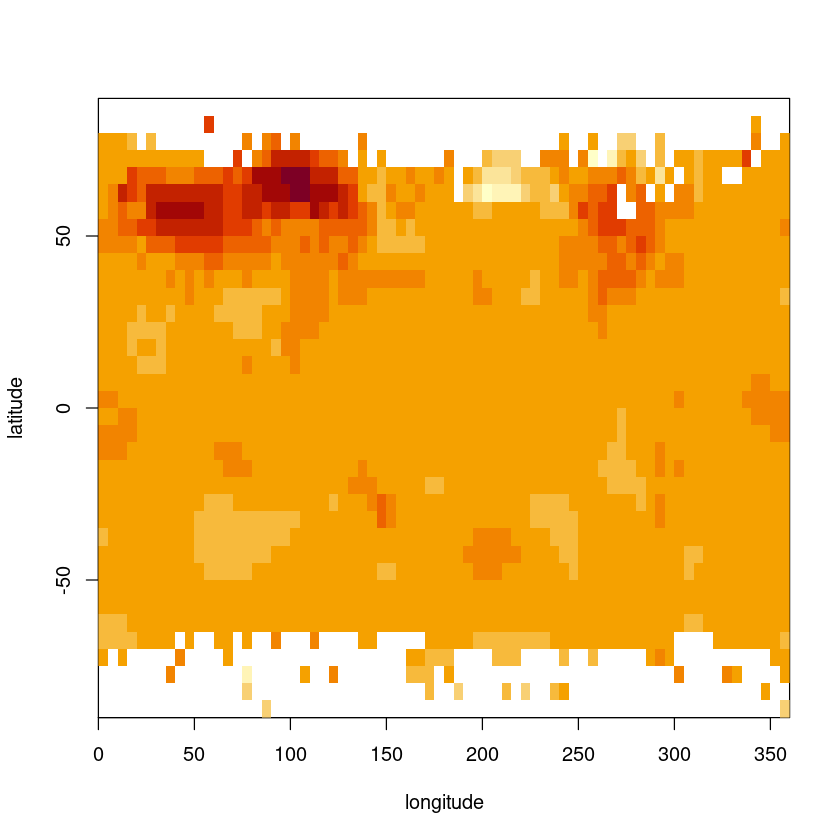

In [11]:
image(longitude, latitude, anom)

That is very basic! Let's use ggplot.

The longitudes need to be adjusted to between -180° and 180° to align with the coastlines in the map.

Let's also switch to a white-centred colour palette.

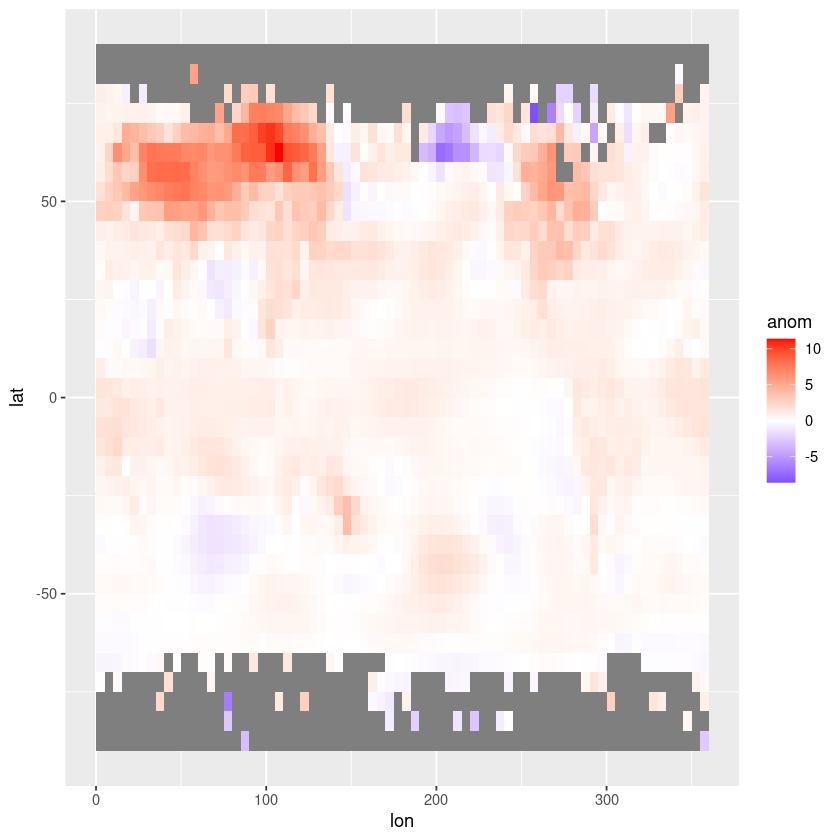

In [12]:
# Convert data to data frame
df <- expand.grid(lon = longitude, lat = latitude)
df$anom <- as.vector(anom)

# Create the plot using ggplot2
ggplot(df, aes(x = lon, y = lat, fill = anom)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(min(df$anom), max(df$anom)))

Let's add the coastlines and country borders now.

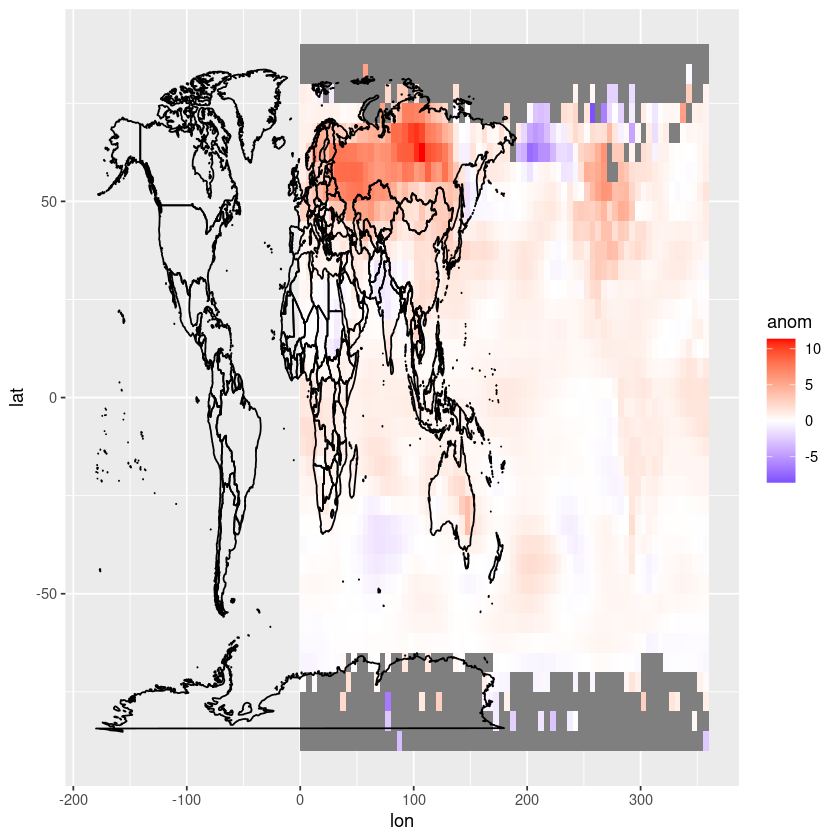

In [13]:
# Create the plot using ggplot2
ggplot(df, aes(x = lon, y = lat, fill = anom)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(min(df$anom), max(df$anom))) +
  geom_polygon(data = map_data("world"), aes(x = long, y = lat, group = group),
               color = "black", fill = NA)

We need to shift the longitude values in our dataframe to be between -180 and 180 instead of 0 and 360-

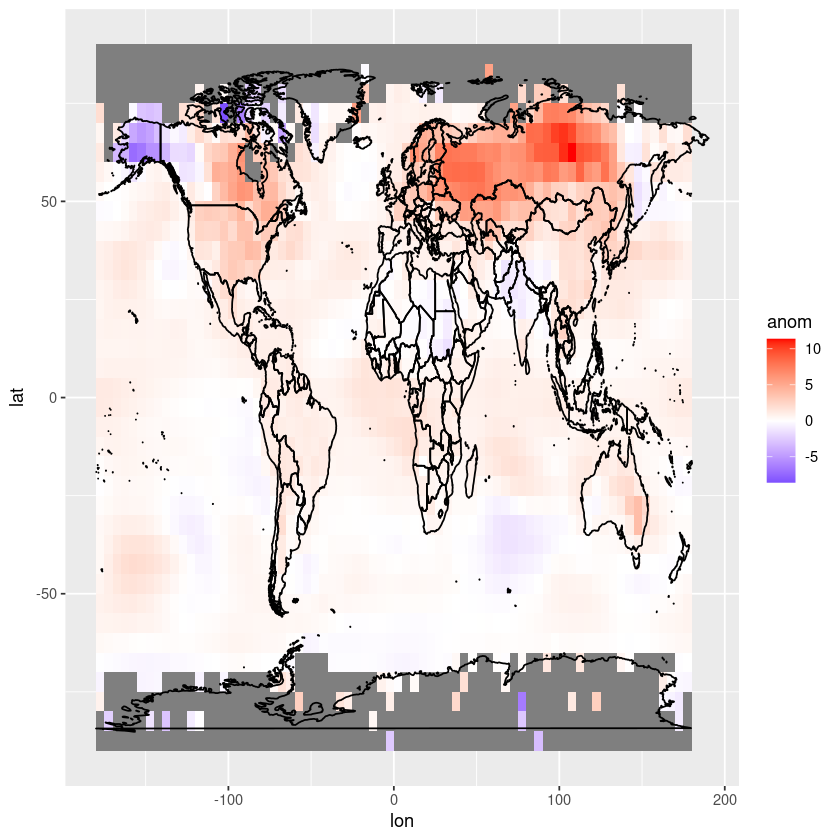

In [14]:
# Adjust lon variable
longitude_shifted <- ifelse(longitude > 180, longitude - 360, longitude)

# Convert data to data frame
df <- expand.grid(lon = longitude_shifted, lat = latitude)
df$anom <- as.vector(anom)

# Create the plot using ggplot2
ggplot(df, aes(x = lon, y = lat, fill = anom)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(min(df$anom), max(df$anom))) +
  geom_polygon(data = map_data("world"), aes(x = long, y = lat, group = group),
               color = "black", fill = NA)

We can adjust the aspect ratio

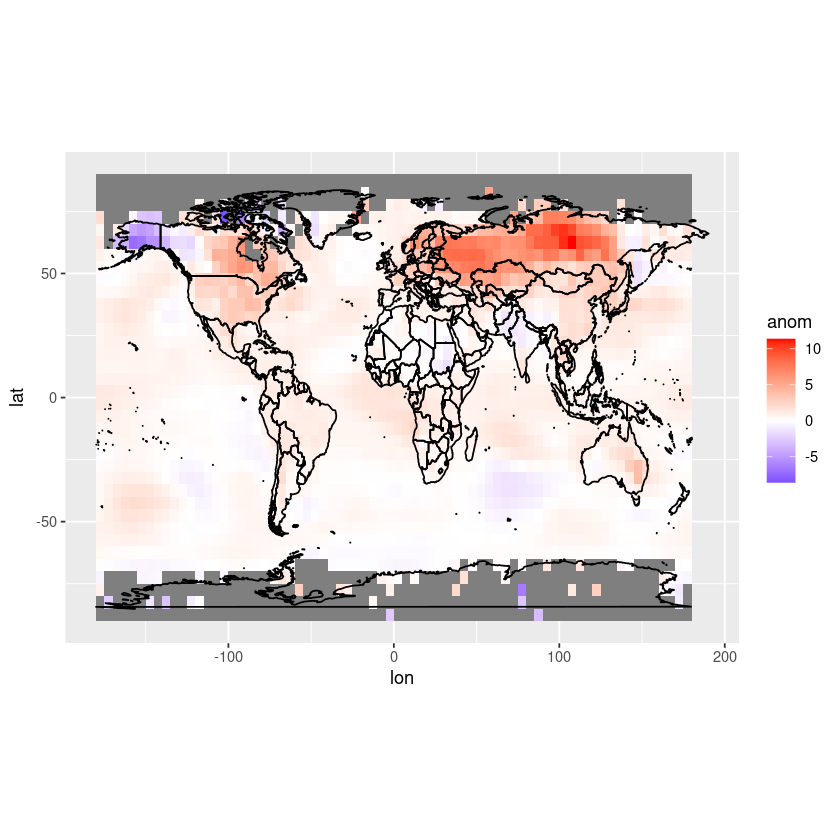

In [15]:
ggplot(df, aes(x = lon, y = lat, fill = anom)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(min(df$anom), max(df$anom))) +
  coord_fixed(ratio = 1.5) +
  geom_polygon(data = map_data("world"), aes(x = long, y = lat, group = group),
               color = "black", fill = NA)

Let's remove the grey box by using `theme_minimal`.

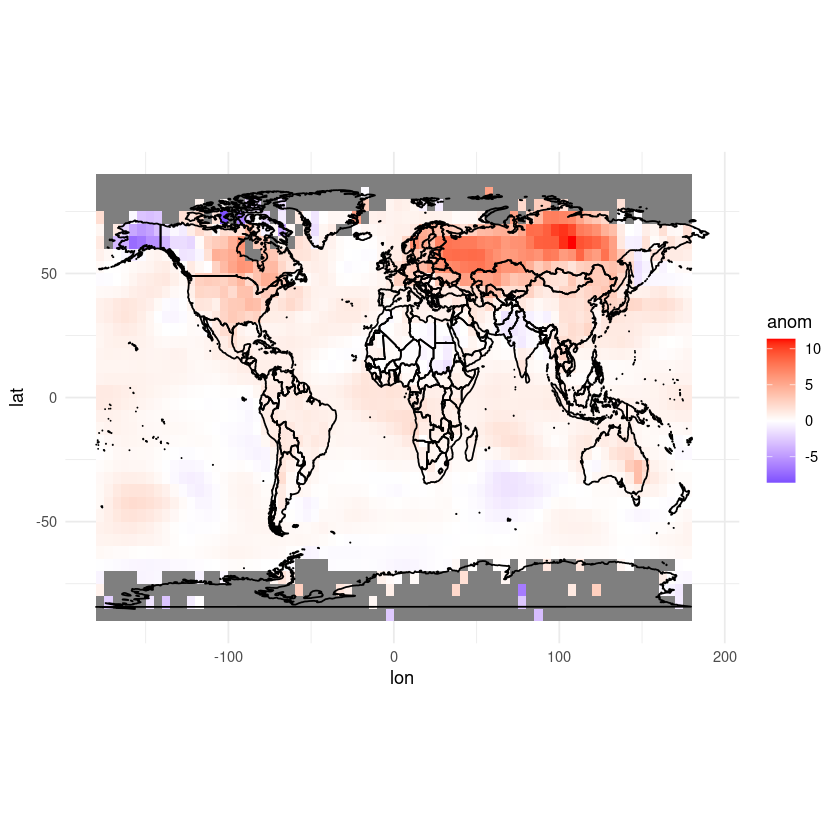

In [16]:
ggplot(df, aes(x = lon, y = lat, fill = anom)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(min(df$anom), max(df$anom))) +
  coord_fixed(ratio = 1.5) +
  theme_minimal() +
  geom_polygon(data = map_data("world"), aes(x = long, y = lat, group = group),
               color = "black", fill = NA)

We might also want to change the label on our colour palette to something more understandable. Let's also move the colour bar to below the axis.

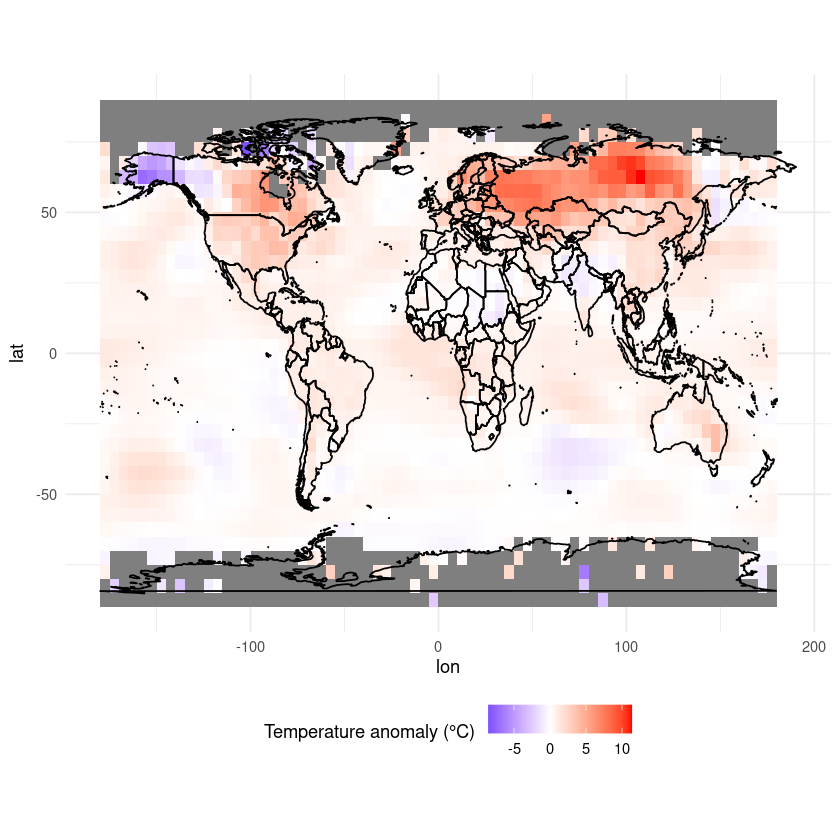

In [17]:
ggplot(df, aes(x = lon, y = lat, fill = anom)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(min(df$anom), max(df$anom))) +
  coord_fixed(ratio = 1.5) +
  theme_minimal() +
  labs(fill = "Temperature anomaly (°C)") +
  theme(legend.position = "bottom") +
  geom_polygon(data = map_data("world"), aes(x = long, y = lat, group = group),
               color = "black", fill = NA)

Finally, let's add a title.

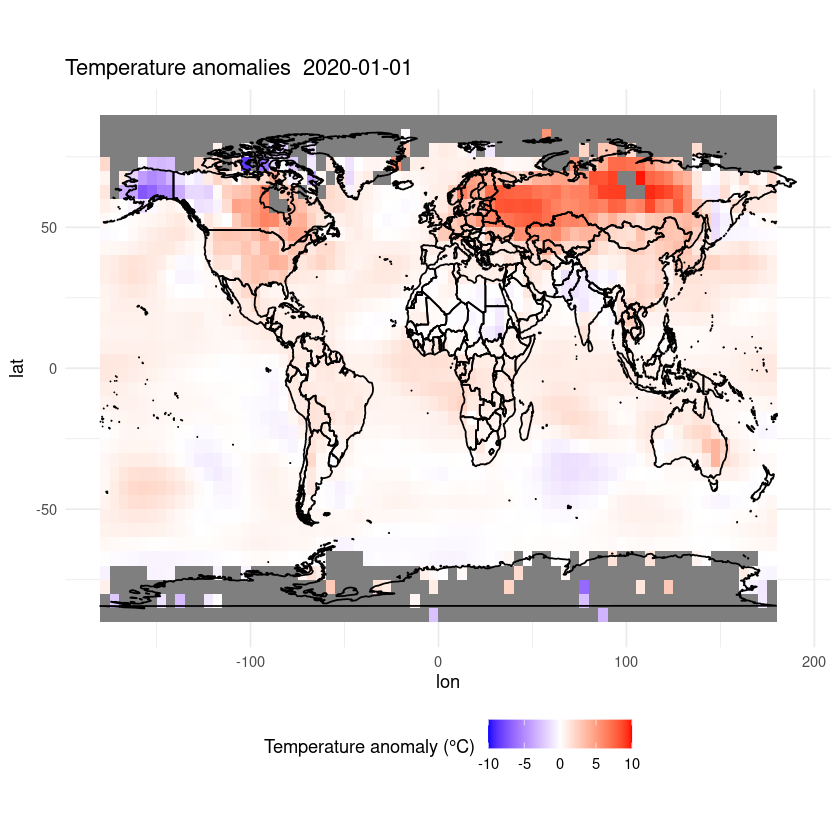

In [18]:
ggplot(df, aes(x = lon, y = lat, fill = anom)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(-10,10)) +
  coord_fixed(ratio = 1.5) +
  theme_minimal() +
  labs(fill = "Temperature anomaly (°C)") +
  theme(legend.position = "bottom") +
  ggtitle(paste("Temperature anomalies ", desired_date)) +
  geom_polygon(data = map_data("world"), aes(x = long, y = lat, group = group),
               color = "black", fill = NA)

Maybe we want to zoom in on a certain region.

Warning message:
“Removed 2480 rows containing missing values or values outside the scale range (`geom_tile()`).”


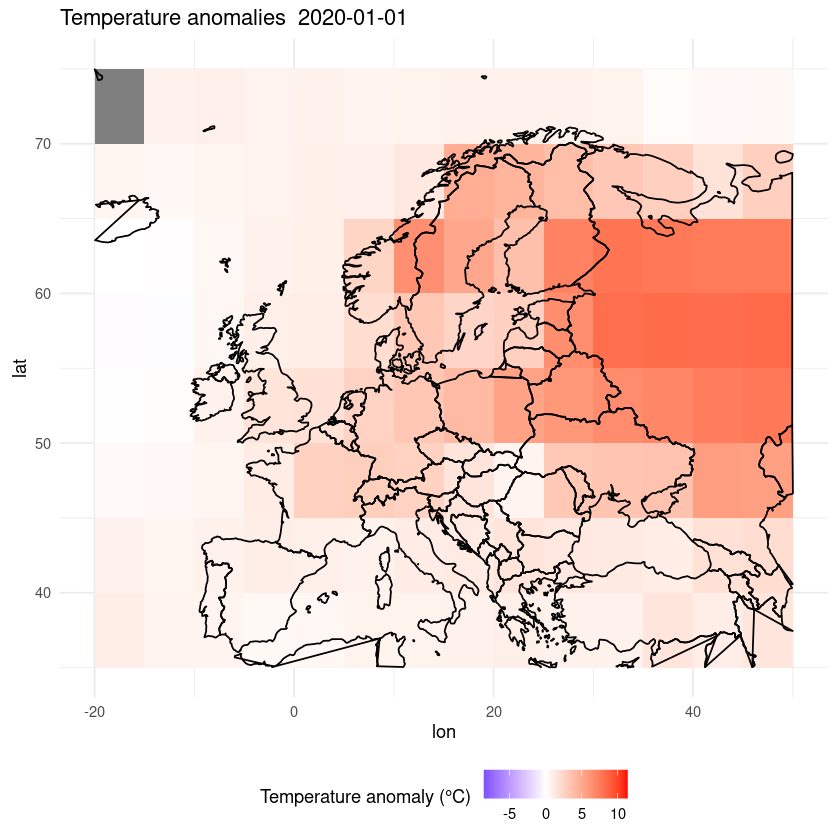

In [19]:
ggplot(df, aes(x = lon, y = lat, fill = anom)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(min(df$anom), max(df$anom))) +
  coord_fixed(ratio = 1.5) +
  theme_minimal() +
  labs(fill = "Temperature anomaly (°C)") +
  theme(legend.position = "bottom") +
  ggtitle(paste("Temperature anomalies ", desired_date)) +
  xlim(-20, 50) +
  ylim(35, 75) +
  geom_polygon(data = map_data("world"), aes(x = long, y = lat, group = group),
               color = "black", fill = NA)

Finally, let's write that as a function so you can easily run it for whichever date you want to. Here's the whole code including the bits before the function, so you can easily take this with you and run it yourself.

I am going to manually set the limits on the color bar this time so we are using the same range for each plot

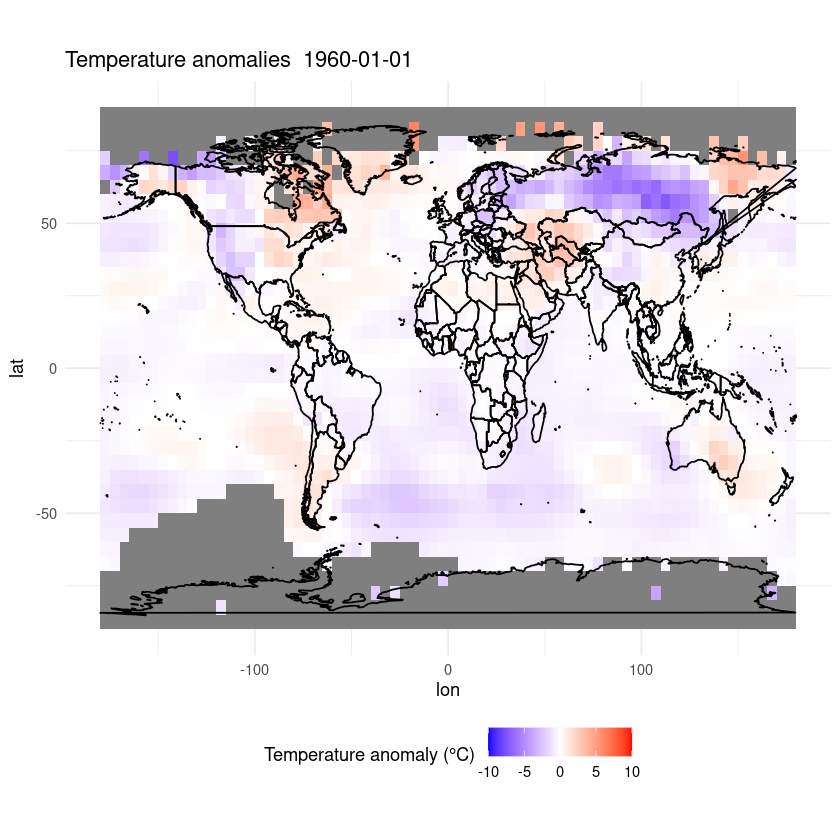

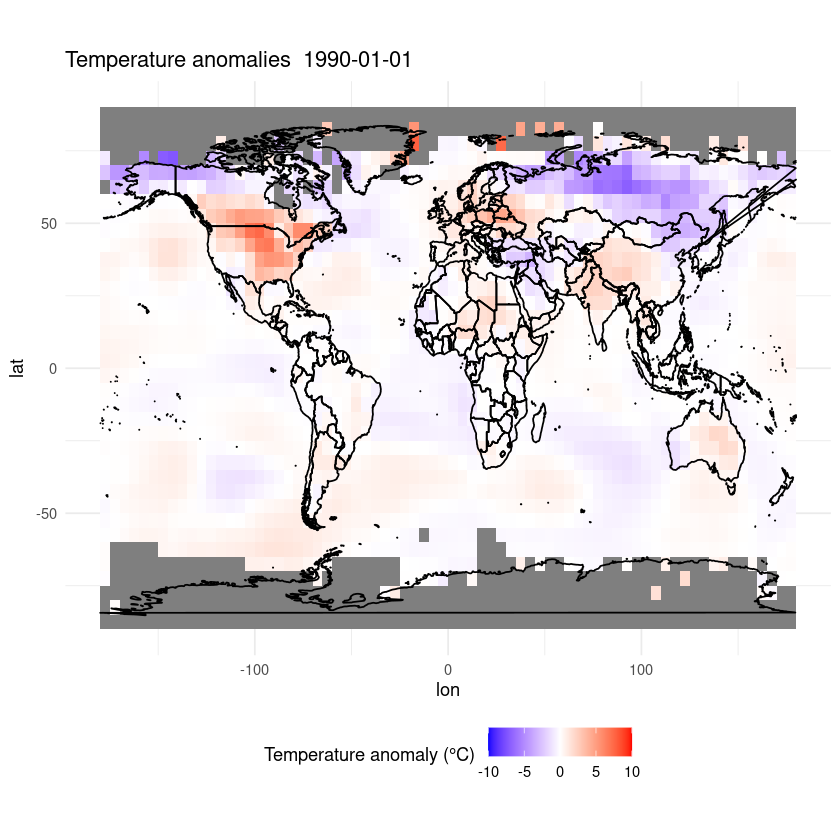

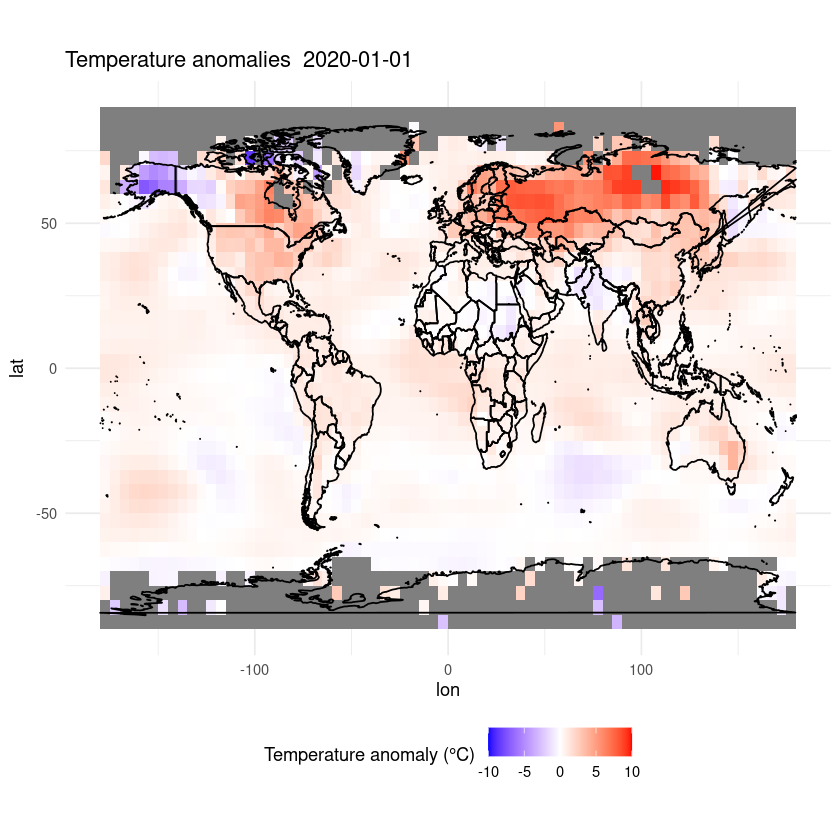

In [20]:
library(RNetCDF)
library(ggplot2)

url <- 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
data <- open.nc(url)

plot_temp_anomaly <- function(desired_date, data) {

  latitude <- var.get.nc(data, 'lat')
  longitude <- var.get.nc(data, 'lon')
  longitude_shifted <- ifelse(longitude > 180, longitude - 360, longitude) # Adjust lon variable
  time <- var.get.nc(data, "time")
  
  days_since_1800 <- as.numeric(difftime(desired_date, as.Date('1800-01-01'), units = 'days'))
  
  # Finding index of the value
  time_index <- which(time == days_since_1800)
  
  anom <- var.get.nc(data, 'anom', start=c(NA, NA, 1, time_index), count=c(NA,NA,1,1))
  
  # Convert data to data frame
  df <- expand.grid(lon = longitude_shifted, lat = latitude)
  df$anom <- as.vector(anom)
  
  ggplot(df, aes(x = lon, y = lat, fill = anom)) +
    geom_tile() +
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(-10,10)) +
    coord_fixed(ratio = 1.5) +
    theme_minimal() +
    labs(fill = "Temperature anomaly (°C)") +
    theme(legend.position = "bottom") +
    ggtitle(paste("Temperature anomalies ", desired_date)) +
    xlim(-180, 180) +
    ylim(-90, 90) +
    geom_polygon(data = map_data("world"), aes(x = long, y = lat, group = group),
                 color = "black", fill = NA)
}

# Example usage:
plot_temp_anomaly(as.Date('1960-01-01'), data)
plot_temp_anomaly(as.Date('1990-01-01'), data)
plot_temp_anomaly(as.Date('2020-01-01'), data)

This is only a short demonstration of how easy it can be to plot data out of a CF-NetCDF file. R is great for plotting data and data analysis and there are many good tutorials online, so go and explore!

## How to cite this course

If you think this course contributed to the work you are doing, consider citing it in your list of references. Here is a recommended citation:

Marsden, L. (2024, May 31). NetCDF in R - from beginner to pro. Zenodo. https://doi.org/10.5281/zenodo.11400754

And you can navigate to the publication and export the citation in different styles and formats by clicking the icon below.

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.11400754.svg)](https://doi.org/10.5281/zenodo.11400754)